# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Define a function to scrape Mars weather data
def scrape_mars_weather():
    url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

    with Browser('chrome') as browser:
        try:
 # Visit the Mars weather site
            browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
 # Create a Beautiful Soup object
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')

In [5]:
 # Scrape the table
            table = soup.find('table', class_='table')
            headers = [header.get_text(strip=True) for header in table.find_all('th')]
            rows = [
                [data.get_text(strip=True) for data in row.find_all('td')]
                for row in table.find_all('tr')[1:]
            ]

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#create an empty list
marsData = []

# Extract all header cells using 'th'
headers = tableData.find_all('th')

# Loop through the header cells to create column names
column_names = [header.text.strip() for header in headers]

# Extract all rows with class 'data-row' and tag  'tr'
rows = tableData.find_all('tr', class_='data-row')

# Loop through each row and extract cell data

for row in rows:
    # Find all data cells in the current row
    row_cells = row.find_all('td')  # Extract all 'td' cells in the row
    row_data = [cell.text.strip() for cell in row_cells]
    marsData.append(row_data)




In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Convert the list of lists (data) into a pandas DataFrame
df = pd.DataFrame(marsData, columns=column_names)

# Display the final DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Convert data types
        df['id'] = df['id'].astype(int)
        df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])            
        df['sol'] = df['sol'].astype(int)
        df['ls'] = df['ls'].astype(float)
        df['month'] = df['month'].astype(int)
        df['min_temp'] = df['min_temp'].astype(float)
        df['pressure'] = df['pressure'].astype(float)

C:\Users\suwillia\AppData\Local\Temp\ipykernel_20900\499757616.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], dayfirst=True)


In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
marsMonths = df["month"].max()
print(f" There are {marsMonths} months per year on Mars")


 There are 12 months per year on Mars


In [35]:
# 2. How many Martian days' worth of data are there?
days=df["sol"].count()
print(f"There are {days} martian days worth of data.")

There are 1867 martian days worth of data.


In [19]:
# 3. What is the average low temperature by month?
averageTemp = df.groupby(df["month"])["min_temp"].mean()
print(averageTemp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


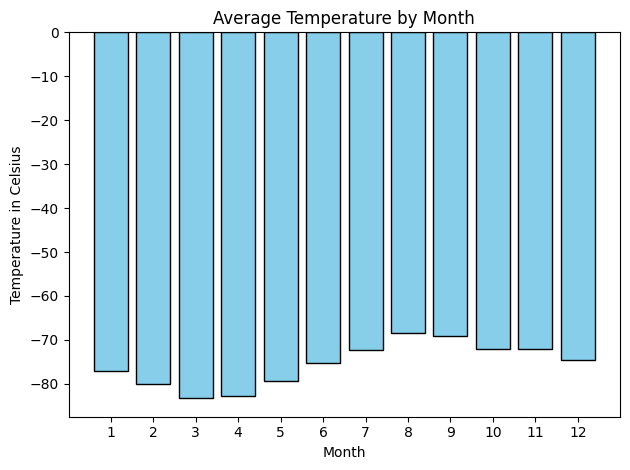

In [21]:
# Plot average temperature by month
        avg_temp_by_month.plot(kind='bar', title='Average Min Temp by Martian Month', xlabel='Month', ylabel='Min Temp (C)')
        plt.show()

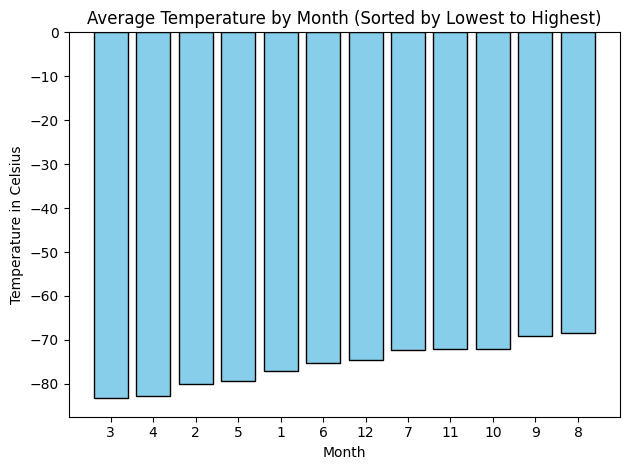

In [24]:
# Identify the coldest and hottest months in Curiosity's location
sortedTemp = averageTemp.sort_values(ascending=True)
plt.bar(sortedTemp.index.astype(str), sortedTemp.values, color='skyblue', edgecolor='black')
plt.title('Average Temperature by Month (Sorted by Lowest to Highest)')
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.tight_layout()
plt.show()



In [25]:
# 4. Average pressure by Martian month
averagePressure = df.groupby(df["month"])["pressure"].mean()
print(averagePressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


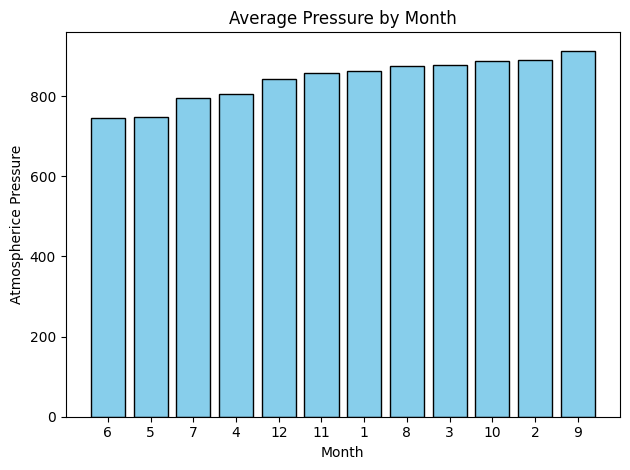

In [29]:
# Plot average pressure by month
        avg_pressure_by_month.plot(kind='bar', title='Average Pressure by Martian Month', xlabel='Month', ylabel='Pressure (Pa)')
        plt.show()

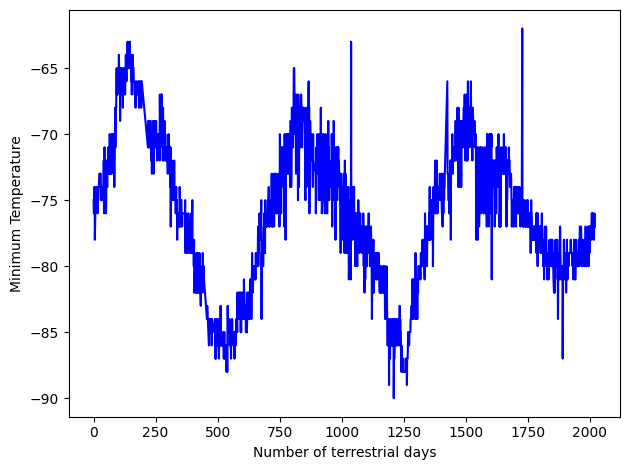

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df['day_of_year'] = df['terrestrial_date'].dt.dayofyear
        plt.plot(df['sol'], df['min_temp'])
        plt.title('Daily Min Temp over Sols')
        plt.xlabel('Sol')
        plt.ylabel('Min Temp (C)')
        plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV
df.to_csv("part_2_mars_weather.csv")

In [45]:
browser.quit()